In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from functions import NPCL
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [2]:
data_path = r"C:\Users\HARSH/Downloads/output.csv"
pipeline = NPCL()
df = pipeline.data_ingestion_npcl(data_path=data_path)
data = df[df['location_id']==100000040403].copy()
data.reset_index(drop= True, inplace= True)
data = pipeline.data_cleaning_and_validation(df=data)
data
# 100000020805

stats at starting: 
 total data points: 2048573, 
 no of location_id: 340.
null values: 0
duplicate values: 13286
duplicate values dropped
duplicate values: 0
stats after: 
 total data points: 2009686, 
 no of location_id: 336.
#############--data ingestion done--################################################################################################################################################

date_time data type: datetime64[ns]
columns with categorical values: error_reason
before cleaning dataframe stats
+-------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+--------+--------+--------+---------+----------+
|       | frequency | R_Voltage | Y_Voltage | B_Voltage | R_Current | Y_Current | B_Current |  R_PF  |  Y_PF  |  B_PF  | Load_kW | Load_KVA |
+-------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+--------+--------+--------+---------+----------+
| count |  4406.0   |  4406.0   |  4406.0   |  440

,location_id,creation_time,frequency,R_Voltage,Y_Voltage,B_Voltage,R_Current,Y_Current,B_Current,R_PF,Y_PF,B_PF,Load_kW,Load_KVA,grid_reading_kwh,grid_reading_kvah,error_reason
0,100000040403,2024-07-01 00:09:17,50.0,243.4,246.9,242.4,0.00,2.00,5.62,1.00,0.95,0.99,1.85,1.87,17775.0,18827.0,No Consumption
1,100000040403,2024-07-01 00:18:42,50.0,244.3,247.3,243.8,0.00,1.81,3.13,1.00,0.99,0.99,1.22,1.28,17776.0,18828.0,Success
2,100000040403,2024-07-01 00:28:17,50.0,245.9,247.6,244.2,0.00,1.19,3.11,1.00,0.85,0.99,1.02,1.07,17776.0,18828.0,No Consumption
3,100000040403,2024-07-01 00:37:51,50.0,246.0,247.5,244.8,0.00,1.42,3.12,1.00,0.91,1.00,1.17,1.25,17776.0,18828.0,No Consumption
4,100000040403,2024-07-01 00:47:20,50.0,245.8,248.9,244.8,0.00,1.40,3.12,1.00,0.93,1.00,1.08,1.11,17776.0,18828.0,No Consumption
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4278,100000040403,2024-07-31 23:19:24,50.0,249.7,252.0,248.7,0.11,1.09,4.75,0.65,0.75,0.99,1.44,1.52,18833.0,19924.0,No Consumption
4279,100000040403,2024-07-31 23:29:12,50.0,249.4,252.7,248.0,0.10,1.50,7.37,1.00,0.91,1.00,2.30,2.36,18833.0,19924.0,No Consumption
4280,100000040403,2024-07-31 23:38:33,50.0,248.0,252.4,248.1,0.10,1.52,5.89,1.00,0.92,0.99,1.87,1.92,18834.0,19924.0,Success
4281,100000040403,2024-07-31 23:48:00,50.0,248.1,251.0,246.3,0.10,1.67,6.63,1.00,0.95,0.99,2.07,2.11,18834.0,19925.0,No Consumption


<Axes: >

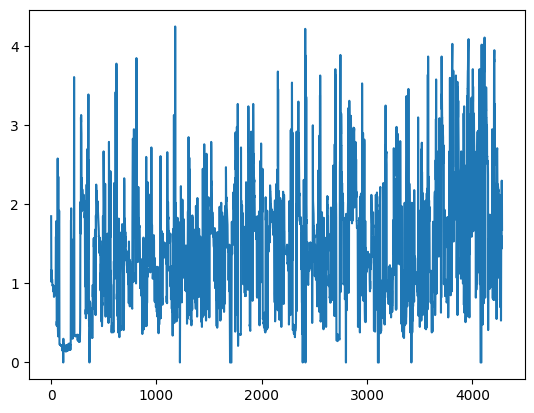

In [3]:
data['Load_kW'].plot()

In [4]:
data.iloc[:,2:-4].describe()

,frequency,R_Voltage,Y_Voltage,B_Voltage,R_Current,Y_Current,B_Current,R_PF,Y_PF,B_PF,Load_kW
count,4283.000000,4283.000000,4283.000000,4283.000000,4283.000000,4283.000000,4283.000000,4283.000000,4283.000000,4283.000000,4283.000000
mean,49.463180,242.691034,244.554821,241.838221,0.742029,1.342302,3.865716,0.920873,0.884375,0.889103,1.423922
std,5.154751,26.427062,26.742630,26.411833,0.919978,0.355363,2.800398,0.143947,0.121620,0.237509,0.781615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.850000,-0.650000,-0.980000,0.000000
25%,50.000000,239.700000,241.100000,238.300000,0.350000,1.140000,1.340000,0.930000,0.860000,0.950000,0.820000
50%,50.000000,244.900000,247.000000,244.600000,0.750000,1.310000,3.700000,0.970000,0.900000,0.990000,1.380000
75%,50.000000,250.900000,252.900000,250.600000,0.870000,1.500000,5.550000,0.990000,0.960000,1.000000,1.900000
max,50.300000,268.600000,267.800000,262.400000,10.140000,9.200000,14.510000,1.000000,1.000000,1.000000,4.250000


In [7]:
df1= data.copy()
df1.drop(['frequency',"Load_KVA","grid_reading_kvah","error_reason","location_id"],axis=1, inplace= True)
df1

,creation_time,R_Voltage,Y_Voltage,B_Voltage,R_Current,Y_Current,B_Current,R_PF,Y_PF,B_PF,Load_kW,grid_reading_kwh
0,2024-07-01 00:09:17,243.4,246.9,242.4,0.00,2.00,5.62,1.00,0.95,0.99,1.85,17775.0
1,2024-07-01 00:18:42,244.3,247.3,243.8,0.00,1.81,3.13,1.00,0.99,0.99,1.22,17776.0
2,2024-07-01 00:28:17,245.9,247.6,244.2,0.00,1.19,3.11,1.00,0.85,0.99,1.02,17776.0
3,2024-07-01 00:37:51,246.0,247.5,244.8,0.00,1.42,3.12,1.00,0.91,1.00,1.17,17776.0
4,2024-07-01 00:47:20,245.8,248.9,244.8,0.00,1.40,3.12,1.00,0.93,1.00,1.08,17776.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4278,2024-07-31 23:19:24,249.7,252.0,248.7,0.11,1.09,4.75,0.65,0.75,0.99,1.44,18833.0
4279,2024-07-31 23:29:12,249.4,252.7,248.0,0.10,1.50,7.37,1.00,0.91,1.00,2.30,18833.0
4280,2024-07-31 23:38:33,248.0,252.4,248.1,0.10,1.52,5.89,1.00,0.92,0.99,1.87,18834.0
4281,2024-07-31 23:48:00,248.1,251.0,246.3,0.10,1.67,6.63,1.00,0.95,0.99,2.07,18834.0


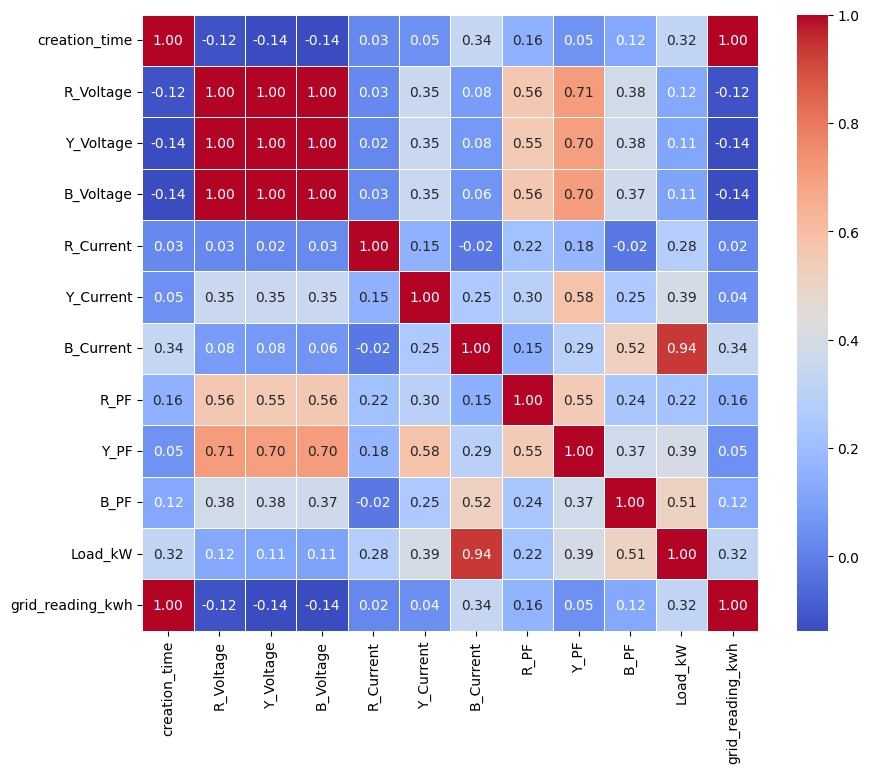

In [10]:
from functions import correlation_matrix
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix1 = df1.iloc[:,:].corr()
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
# Draw the heatmap
sns.heatmap(correlation_matrix1, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
# Show the plot
plt.show()

In [11]:
df1

,creation_time,R_Voltage,Y_Voltage,B_Voltage,R_Current,Y_Current,B_Current,R_PF,Y_PF,B_PF,Load_kW,grid_reading_kwh
0,2024-07-01 00:09:17,243.4,246.9,242.4,0.00,2.00,5.62,1.00,0.95,0.99,1.85,17775.0
1,2024-07-01 00:18:42,244.3,247.3,243.8,0.00,1.81,3.13,1.00,0.99,0.99,1.22,17776.0
2,2024-07-01 00:28:17,245.9,247.6,244.2,0.00,1.19,3.11,1.00,0.85,0.99,1.02,17776.0
3,2024-07-01 00:37:51,246.0,247.5,244.8,0.00,1.42,3.12,1.00,0.91,1.00,1.17,17776.0
4,2024-07-01 00:47:20,245.8,248.9,244.8,0.00,1.40,3.12,1.00,0.93,1.00,1.08,17776.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4278,2024-07-31 23:19:24,249.7,252.0,248.7,0.11,1.09,4.75,0.65,0.75,0.99,1.44,18833.0
4279,2024-07-31 23:29:12,249.4,252.7,248.0,0.10,1.50,7.37,1.00,0.91,1.00,2.30,18833.0
4280,2024-07-31 23:38:33,248.0,252.4,248.1,0.10,1.52,5.89,1.00,0.92,0.99,1.87,18834.0
4281,2024-07-31 23:48:00,248.1,251.0,246.3,0.10,1.67,6.63,1.00,0.95,0.99,2.07,18834.0


In [28]:
import requests
lat, long= "28.625361","77.376214"#, 28.628059,77.378912
url = f"https://archive-api.open-meteo.com/v1/archive?latitude={lat}&longitude={long}&start_date=2024-07-01&end_date=2024-07-31&hourly=temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,rain,wind_speed_10m,wind_speed_100m"
print(url)
response = requests.get(url)
response.raise_for_status()
weather_data = response.json()

https://archive-api.open-meteo.com/v1/archive?latitude=28.625361&longitude=77.376214&start_date=2024-07-01&end_date=2024-07-31&hourly=temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,rain,wind_speed_10m,wind_speed_100m


In [35]:
for i in range(len(weather_data['hourly']['time'])):
                hour_data = {
    # "_id": f"{site_data['_id']}_{weather_data['hourly']['time'][i]}",  # MongoDB's unique identifier
    # "site_id": site_data["_id"],
    "time": weather_data['hourly']['time'][i],
    "temperature_2m": weather_data['hourly'].get('temperature_2m', [])[i],
    "relative_humidity_2m": weather_data['hourly'].get('relative_humidity_2m', [])[i],
    "apparent_temperature": weather_data['hourly'].get('apparent_temperature', [])[i],
    "precipitation": weather_data['hourly'].get('precipitation', [])[i],
    "wind_speed_10m": weather_data['hourly'].get('wind_speed_10m', [])[i],
    "wind_speed_100m": weather_data['hourly'].get('wind_speed_100m', [])[i],
    "creation_time_iso": datetime.utcfromtimestamp(
        datetime.strptime(weather_data['hourly']['time'][i],
                            '%Y-%m-%dT%H:%M').timestamp()).isoformat()
}
# hour_data
weather_df = pd.DataFrame(weather_data['hourly'])
weather_df['time'] = pd.to_datetime(weather_df['time'])
weather_df.rename(columns={"time":"creation_time"}, inplace=True)
weather_df

,creation_time,temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,rain,wind_speed_10m,wind_speed_100m
0,2024-07-01 00:00:00,25.3,96,30.4,3.9,3.9,9.8,13.3
1,2024-07-01 01:00:00,27.9,89,34.9,0.0,0.0,2.3,2.3
2,2024-07-01 02:00:00,28.7,84,35.0,0.0,0.0,6.4,8.0
3,2024-07-01 03:00:00,29.9,77,35.7,0.0,0.0,8.4,10.7
4,2024-07-01 04:00:00,31.1,73,37.1,0.0,0.0,8.2,10.2
...,...,...,...,...,...,...,...,...
739,2024-07-31 19:00:00,26.7,96,31.3,25.1,25.1,19.3,31.0
740,2024-07-31 20:00:00,26.8,96,32.7,15.3,15.3,10.8,18.8
741,2024-07-31 21:00:00,26.8,97,33.3,6.0,6.0,7.8,13.1
742,2024-07-31 22:00:00,26.7,97,32.6,3.9,3.9,11.2,17.7


In [27]:
import requests
from datetime import datetime

def weather_data_api(latitude, longitude,from_date,to_date):
    try:
        url = f"https://archive-api.open-meteo.com/v1/archive?latitude={latitude}&longitude={longitude}&start_date={from_date}&end_date={to_date}&hourly=temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,rain,wind_speed_10m,wind_speed_100m"
        print(f"{url}")
        response = requests.get(url)
        response.raise_for_status()
        weather_data = response.json()
        
        for i in range(len(weather_data['hourly']['time'])):
                        hour_data = {
            # "_id": f"{site_data['_id']}_{weather_data['hourly']['time'][i]}",  # MongoDB's unique identifier
            # "site_id": site_data["_id"],
            "time": weather_data['hourly']['time'][i],
            "temperature_2m": weather_data['hourly'].get('temperature_2m', [])[i],
            "relative_humidity_2m": weather_data['hourly'].get('relative_humidity_2m', [])[i],
            "apparent_temperature": weather_data['hourly'].get('apparent_temperature', [])[i],
            "precipitation": weather_data['hourly'].get('precipitation', [])[i],
            "wind_speed_10m": weather_data['hourly'].get('wind_speed_10m', [])[i],
            "wind_speed_100m": weather_data['hourly'].get('wind_speed_100m', [])[i],
            "creation_time_iso": datetime.utcfromtimestamp(
                datetime.strptime(weather_data['hourly']['time'][i],
                                    '%Y-%m-%dT%H:%M').timestamp()).isoformat()
        }
        weather_df = pd.DataFrame(weather_data['hourly'])
        weather_df['time'] = pd.to_datetime(weather_df['time'])
        weather_df.rename(columns={"time":"creation_time"}, inplace=True)
        return weather_df
            
    except Exception as e:
            print(f"error in weather data: {e}")

latitude, longitude = "28.625361","77.376214"#, 28.628059,77.378912
from_date = "2024-07-01"
to_date = "2024-07-31"
weather_df = weather_data_api(latitude,longitude,from_date,to_date)

https://archive-api.open-meteo.com/v1/archive?latitude=28.625361&longitude=77.376214&start_date=2024-07-01&end_date=2024-07-31&hourly=temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,rain,wind_speed_10m,wind_speed_100m
error in weather data: 'creation_time'


In [116]:
df1

,R_Voltage,Y_Voltage,B_Voltage,R_Current,Y_Current,B_Current,R_PF,Y_PF,B_PF,Load_kW,grid_reading_kwh
creation_time,,,,,,,,,,,
2024-07-01 00:09:17,243.4,246.9,242.4,0.00,2.00,5.62,1.00,0.95,0.99,1.85,17775.0
2024-07-01 00:18:42,244.3,247.3,243.8,0.00,1.81,3.13,1.00,0.99,0.99,1.22,17776.0
2024-07-01 00:28:17,245.9,247.6,244.2,0.00,1.19,3.11,1.00,0.85,0.99,1.02,17776.0
2024-07-01 00:37:51,246.0,247.5,244.8,0.00,1.42,3.12,1.00,0.91,1.00,1.17,17776.0
2024-07-01 00:47:20,245.8,248.9,244.8,0.00,1.40,3.12,1.00,0.93,1.00,1.08,17776.0
...,...,...,...,...,...,...,...,...,...,...,...
2024-07-31 23:19:24,249.7,252.0,248.7,0.11,1.09,4.75,0.65,0.75,0.99,1.44,18833.0
2024-07-31 23:29:12,249.4,252.7,248.0,0.10,1.50,7.37,1.00,0.91,1.00,2.30,18833.0
2024-07-31 23:38:33,248.0,252.4,248.1,0.10,1.52,5.89,1.00,0.92,0.99,1.87,18834.0


In [124]:
df1['prev_reading'] = df1['grid_reading_kwh'].shift(1)
df1.dropna(inplace=True)
df1['consumed_unit'] = df1['grid_reading_kwh']- df1['prev_reading']
df1[df1['consumed_unit']==0]

,R_Voltage,Y_Voltage,B_Voltage,R_Current,Y_Current,B_Current,R_PF,Y_PF,B_PF,Load_kW,grid_reading_kwh,prev_reading,consumed_unit
creation_time,,,,,,,,,,,,,
2024-07-01 01:16:09,247.9,249.4,247.3,0.00,1.33,3.04,1.00,0.88,0.99,1.06,17777.0,17777.0,0.0
2024-07-01 01:25:35,247.9,249.4,247.3,0.00,1.33,3.04,1.00,0.88,0.99,1.06,17777.0,17777.0,0.0
2024-07-01 01:35:09,248.6,250.9,247.3,0.00,1.33,3.02,1.00,0.88,0.99,1.05,17777.0,17777.0,0.0
2024-07-01 01:44:44,247.7,250.5,247.9,0.00,1.33,3.00,1.00,0.88,1.00,1.05,17777.0,17777.0,0.0
2024-07-01 01:54:28,249.3,250.2,248.0,0.00,1.33,2.75,1.00,0.88,0.99,0.98,17777.0,17777.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-31 23:00:15,249.8,251.1,249.1,0.49,1.09,4.98,0.98,0.76,0.99,1.60,18833.0,18833.0,0.0
2024-07-31 23:09:42,250.3,251.9,249.3,0.49,1.09,4.89,0.98,0.75,1.00,1.58,18833.0,18833.0,0.0
2024-07-31 23:19:24,249.7,252.0,248.7,0.11,1.09,4.75,0.65,0.75,0.99,1.44,18833.0,18833.0,0.0


# load prediction

In [23]:
# df1.set_index(['creation_time'],drop= True, inplace= True)
resample_df = df1[['Load_kW']].resample(rule="h").mean()
resample_df

,Load_kW
creation_time,
2024-07-01 00:00:00,1.233333
2024-07-01 01:00:00,1.045000
2024-07-01 02:00:00,0.975000
2024-07-01 03:00:00,0.967143
2024-07-01 04:00:00,0.920000
...,...
2024-07-31 19:00:00,1.644286
2024-07-31 20:00:00,1.361667
2024-07-31 21:00:00,1.251667


In [39]:
def add_lags(dff):
    try:
        # 15 minutes, 30 minutes, 1 hour
        dff['lag1'] = (dff.index - pd.Timedelta('15 minutes')).map(target_map)
        dff['lag2'] = (dff.index - pd.Timedelta('30 minutes')).map(target_map)
        dff['lag3'] = (dff.index - pd.Timedelta('1 day')).map(target_map)
        dff['lag4'] = (dff.index - pd.Timedelta('7 days')).map(target_map)
        # df['lag5'] = (df.index - pd.Timedelta('15 days')).map(target_map)
        # df['lag6'] = (df.index - pd.Timedelta('30 days')).map(target_map)
        # df['lag7'] = (df.index - pd.Timedelta('45 days')).map(target_map)
        return dff
    
    except KeyError as e:
        print(f"Error: {e}. 'consumed_unit' column not found in the DataFrame.")
    except Exception as ex:
        print(f"An unexpected error occurred: {ex}")

def create_features(hourly_data):
    hourly_data = hourly_data.copy()
    # Check if the index is in datetime format
    if not isinstance(hourly_data.index, pd.DatetimeIndex):
        hourly_data.index = pd.to_datetime(hourly_data.index)
    
    hourly_data['hour'] = hourly_data.index.hour
    hourly_data['day'] = hourly_data.index.day
    hourly_data['dayofweek'] = hourly_data.index.dayofweek
    hourly_data['weekofyear'] = hourly_data.index.isocalendar().week
    hourly_data['hour'] = hourly_data.index.hour
    # hourly_data['month'] = hourly_data.index.month
    hourly_data['dayofweek'] = hourly_data.index.dayofweek
    # hourly_data['quarter'] = hourly_data.index.quarter
    hourly_data['dayofyear'] = hourly_data.index.dayofyear
    hourly_data['is_weekend'] = hourly_data['dayofweek'].isin([5, 6]).astype(int)

    # hourly_data['weekofyear'] = hourly_data.index.isocalendar().week
    # hourly_data['year'] = hourly_data.index.year
    return hourly_data

df2 = create_features(resample_df)
df2

,Load_kW,hour,day,dayofweek,weekofyear,dayofyear,is_weekend
creation_time,,,,,,,
2024-07-01 00:00:00,1.233333,0,1,0,27,183,0
2024-07-01 01:00:00,1.045000,1,1,0,27,183,0
2024-07-01 02:00:00,0.975000,2,1,0,27,183,0
2024-07-01 03:00:00,0.967143,3,1,0,27,183,0
2024-07-01 04:00:00,0.920000,4,1,0,27,183,0
...,...,...,...,...,...,...,...
2024-07-31 19:00:00,1.644286,19,31,2,31,213,0
2024-07-31 20:00:00,1.361667,20,31,2,31,213,0
2024-07-31 21:00:00,1.251667,21,31,2,31,213,0


In [40]:
df3 = df2.merge(weather_df,on=["creation_time"])
df3.drop(['creation_time'],axis=1,inplace=True)
df3

,Load_kW,hour,day,dayofweek,weekofyear,dayofyear,is_weekend,temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,rain,wind_speed_10m,wind_speed_100m
0,1.233333,0,1,0,27,183,0,25.3,96,30.4,3.9,3.9,9.8,13.3
1,1.045000,1,1,0,27,183,0,27.9,89,34.9,0.0,0.0,2.3,2.3
2,0.975000,2,1,0,27,183,0,28.7,84,35.0,0.0,0.0,6.4,8.0
3,0.967143,3,1,0,27,183,0,29.9,77,35.7,0.0,0.0,8.4,10.7
4,0.920000,4,1,0,27,183,0,31.1,73,37.1,0.0,0.0,8.2,10.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,1.644286,19,31,2,31,213,0,26.7,96,31.3,25.1,25.1,19.3,31.0
740,1.361667,20,31,2,31,213,0,26.8,96,32.7,15.3,15.3,10.8,18.8
741,1.251667,21,31,2,31,213,0,26.8,97,33.3,6.0,6.0,7.8,13.1
742,1.233333,22,31,2,31,213,0,26.7,97,32.6,3.9,3.9,11.2,17.7


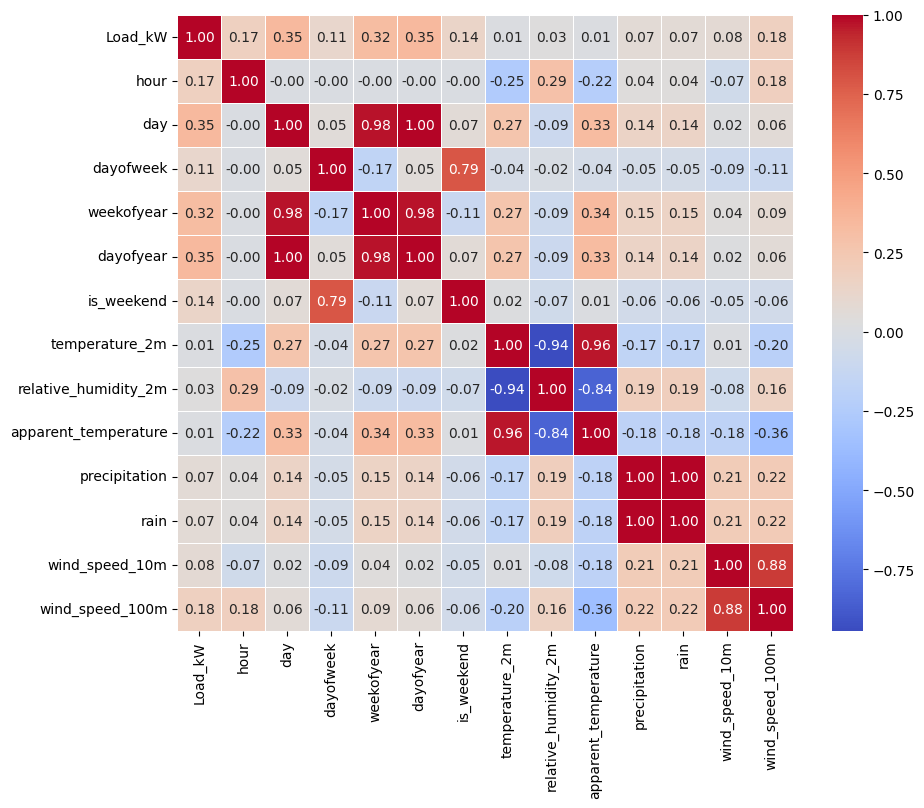

In [41]:
correlation_matrix(df3)

In [45]:
from sklearn.preprocessing import MinMaxScaler

# Assuming your DataFrame is called df
# Exclude 'Load_kW' from normalization if it's an identifier or target column
features_to_normalize = ['hour', 'day', 'dayofweek', 'weekofyear', 'dayofyear', 'is_weekend',
                         'temperature_2m', 'relative_humidity_2m', 'apparent_temperature', 
                         'precipitation', 'rain', 'wind_speed_10m', 'wind_speed_100m']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the features
df3[features_to_normalize] = scaler.fit_transform(df3[features_to_normalize])

# Now df contains normalized values between 0 and 1 for the specified columns
df3.head()


,Load_kW,hour,day,dayofweek,weekofyear,dayofyear,is_weekend,temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,rain,wind_speed_10m,wind_speed_100m
0,1.233333,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.931818,0.026490,0.065767,0.065767,0.389121,0.348649
1,1.045000,0.043478,0.0,0.0,0.0,0.0,0.0,0.232143,0.772727,0.324503,0.000000,0.000000,0.075314,0.051351
2,0.975000,0.086957,0.0,0.0,0.0,0.0,0.0,0.303571,0.659091,0.331126,0.000000,0.000000,0.246862,0.205405
3,0.967143,0.130435,0.0,0.0,0.0,0.0,0.0,0.410714,0.500000,0.377483,0.000000,0.000000,0.330544,0.278378
4,0.920000,0.173913,0.0,0.0,0.0,0.0,0.0,0.517857,0.409091,0.470199,0.000000,0.000000,0.322176,0.264865


In [48]:
df3

,Load_kW,hour,day,dayofweek,weekofyear,dayofyear,is_weekend,temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,rain,wind_speed_10m,wind_speed_100m
0,1.233333,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.931818,0.026490,0.065767,0.065767,0.389121,0.348649
1,1.045000,0.043478,0.0,0.000000,0.0,0.0,0.0,0.232143,0.772727,0.324503,0.000000,0.000000,0.075314,0.051351
2,0.975000,0.086957,0.0,0.000000,0.0,0.0,0.0,0.303571,0.659091,0.331126,0.000000,0.000000,0.246862,0.205405
3,0.967143,0.130435,0.0,0.000000,0.0,0.0,0.0,0.410714,0.500000,0.377483,0.000000,0.000000,0.330544,0.278378
4,0.920000,0.173913,0.0,0.000000,0.0,0.0,0.0,0.517857,0.409091,0.470199,0.000000,0.000000,0.322176,0.264865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,1.644286,0.826087,1.0,0.333333,1.0,1.0,0.0,0.125000,0.931818,0.086093,0.423272,0.423272,0.786611,0.827027
740,1.361667,0.869565,1.0,0.333333,1.0,1.0,0.0,0.133929,0.931818,0.178808,0.258010,0.258010,0.430962,0.497297
741,1.251667,0.913043,1.0,0.333333,1.0,1.0,0.0,0.133929,0.954545,0.218543,0.101180,0.101180,0.305439,0.343243
742,1.233333,0.956522,1.0,0.333333,1.0,1.0,0.0,0.125000,0.954545,0.172185,0.065767,0.065767,0.447699,0.467568


In [84]:
week_2_df = df3.loc[df3['weekofyear']<0.26]
# df3['weekofyear'].unique()
week_2_df

,Load_kW,hour,day,dayofweek,weekofyear,dayofyear,is_weekend,temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,rain,wind_speed_10m,wind_speed_100m
0,1.233333,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.000000,0.931818,0.026490,0.065767,0.065767,0.389121,0.348649
1,1.045000,0.043478,0.000000,0.0,0.00,0.000000,0.0,0.232143,0.772727,0.324503,0.000000,0.000000,0.075314,0.051351
2,0.975000,0.086957,0.000000,0.0,0.00,0.000000,0.0,0.303571,0.659091,0.331126,0.000000,0.000000,0.246862,0.205405
3,0.967143,0.130435,0.000000,0.0,0.00,0.000000,0.0,0.410714,0.500000,0.377483,0.000000,0.000000,0.330544,0.278378
4,0.920000,0.173913,0.000000,0.0,0.00,0.000000,0.0,0.517857,0.409091,0.470199,0.000000,0.000000,0.322176,0.264865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,1.672000,0.826087,0.433333,1.0,0.25,0.433333,1.0,0.357143,0.613636,0.390728,0.000000,0.000000,0.188285,0.364865
332,2.308571,0.869565,0.433333,1.0,0.25,0.433333,1.0,0.321429,0.636364,0.370861,0.000000,0.000000,0.163180,0.337838
333,2.631667,0.913043,0.433333,1.0,0.25,0.433333,1.0,0.294643,0.681818,0.317881,0.000000,0.000000,0.255230,0.229730
334,2.245000,0.956522,0.433333,1.0,0.25,0.433333,1.0,0.000000,0.886364,0.000000,0.082631,0.082631,0.418410,0.445946


In [87]:
def model_trainer(dataset):
    try:
        dataset_features = dataset.copy()
        dataset_label = dataset_features.pop("Load_kW")
        # Split the dataset into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(dataset_features, dataset_label, test_size=0.2, random_state=42)
        # Step 4: Initialize the RandomForestRegressor model
        model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can tweak hyperparameters
        # Step 5: Train the model
        model.fit(X_train, y_train)
        
        # Step 6: Make predictions
        y_power_pred = model_power.predict(X_test)

        # Step 7: Evaluate the model
        print("\nModel Power Evaluation")
        print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_power_pred))
        print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_power_pred))
        print("R-squared:", r2_score(y_test, y_power_pred))

        # Scatter plot
        plt.figure(figsize=(10, 6))
        # Plot actual values in red
        plt.plot(range(len(y_test)), y_test, color='red', label='Actual Power')
        # Plot predicted values in blue
        plt.plot(range(len(y_power_pred)), y_power_pred, color='blue', label='Predicted Power')
        # Adding labels and title
        plt.xlabel('Time')
        plt.ylabel('load')
        plt.title('Actual vs Predicted load')
        plt.legend()
        plt.tight_layout()
        plt.show()
        return model
    except Exception as e:
        print(f"error in model trainer: {e}")

In [94]:
print("1st:",len(df3.loc[df3['weekofyear']==0]))
print("2st:",len(df3.loc[df3['weekofyear']<0.26]))
print("3st:",len(df3.loc[df3['weekofyear']<0.51]))
print("4st:",len(df3.loc[df3['weekofyear']<0.76]))
print("5st:",len(df3.loc[df3['weekofyear']<1.1]))

1st: 168
2st: 336
3st: 504
4st: 672
5st: 744


## 1st week data model


Model Power Evaluation
Mean Squared Error (MSE): 0.12204031154793926
Mean Absolute Error (MAE): 0.24439626050420174
R-squared: 0.7374387450309332


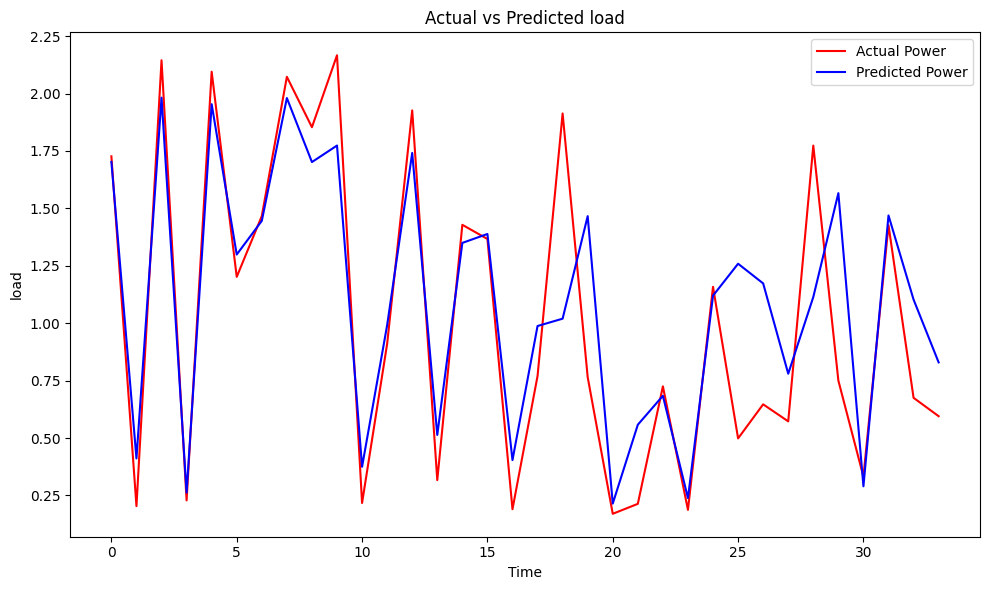

In [95]:
week_1_df = df3.loc[df3['weekofyear']==0]
week_1_model = model_trainer(week_1_df)

## 2nd week data model


Model Power Evaluation
Mean Squared Error (MSE): 0.247577341328519
Mean Absolute Error (MAE): 0.3878123914565826
R-squared: 0.3108886903314121


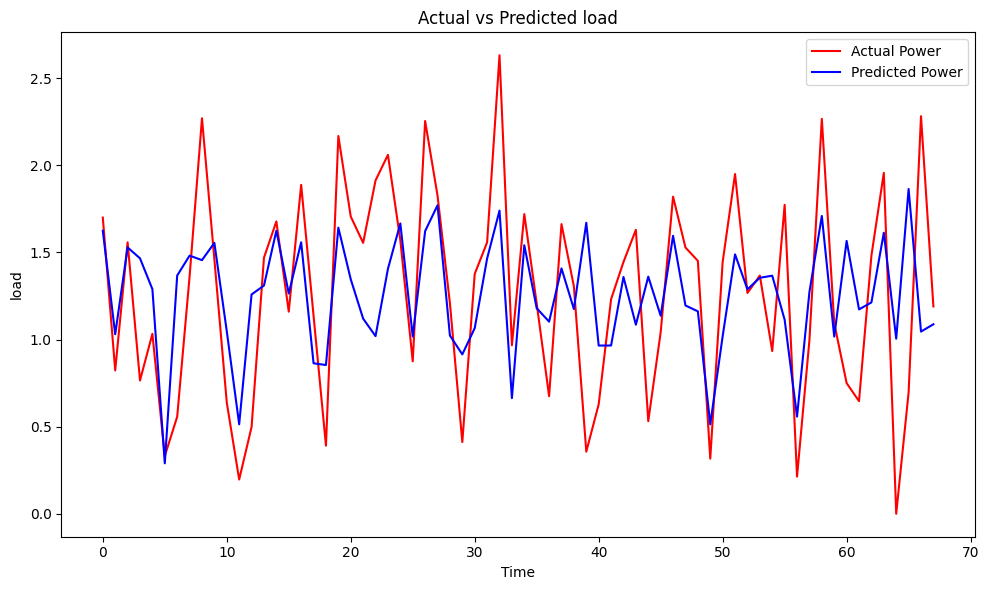

In [96]:
week_2_df = df3.loc[df3['weekofyear']<0.26]
week_2_model = model_trainer(week_2_df)

## 3rd week data model


Model Power Evaluation
Mean Squared Error (MSE): 0.2286342664563234
Mean Absolute Error (MAE): 0.3264059594530882
R-squared: 0.37617866549519907


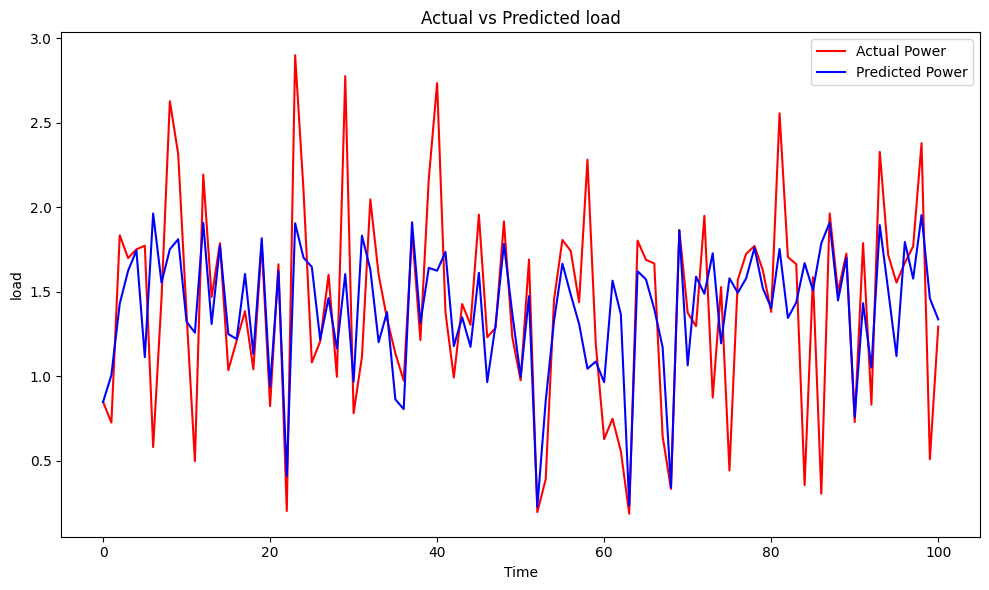

In [97]:
week_3_df = df3.loc[df3['weekofyear']<0.51]
week_3_model = model_trainer(week_3_df)

## 4th week data model


Model Power Evaluation
Mean Squared Error (MSE): 0.21110463388040343
Mean Absolute Error (MAE): 0.343520058201058
R-squared: 0.39395693710202784


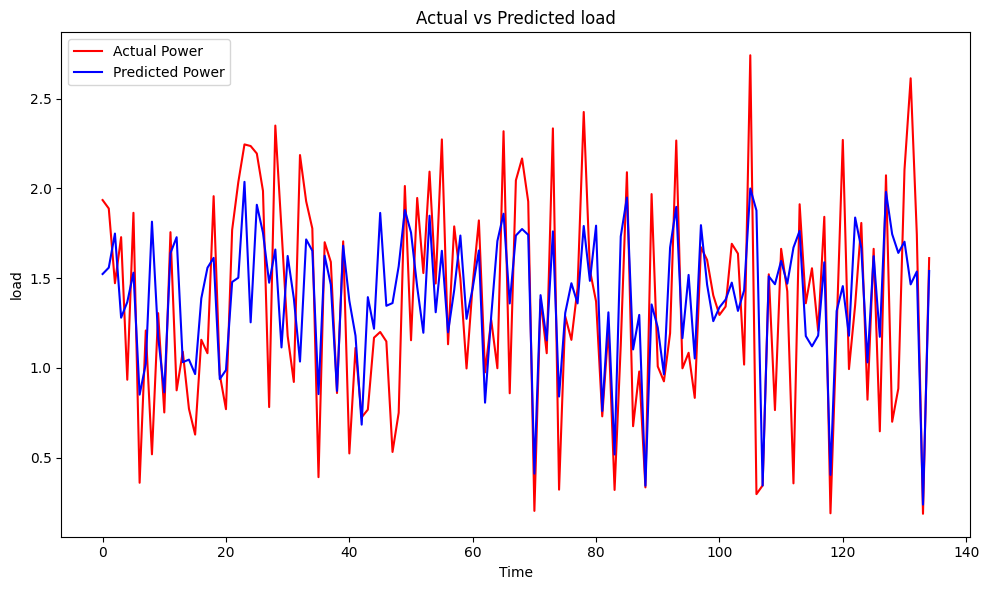

In [98]:
week_4_df = df3.loc[df3['weekofyear']<0.76]
week_4_model = model_trainer(week_4_df)

## testing on final week data

In [107]:
week_5_df = df3.loc[df3['weekofyear']==1].copy()
# week_5_df.drop(['Load_kW'],axis=1,inplace=True)
week_5_df_feature = week_5_df.copy()
week_5_df_actual = week_5_df_feature.pop('Load_kW')

In [108]:
pred1 = week_1_model.predict(week_5_df_feature)
pred2 = week_2_model.predict(week_5_df_feature)
pred3 = week_3_model.predict(week_5_df_feature)
pred4 = week_4_model.predict(week_5_df_feature)


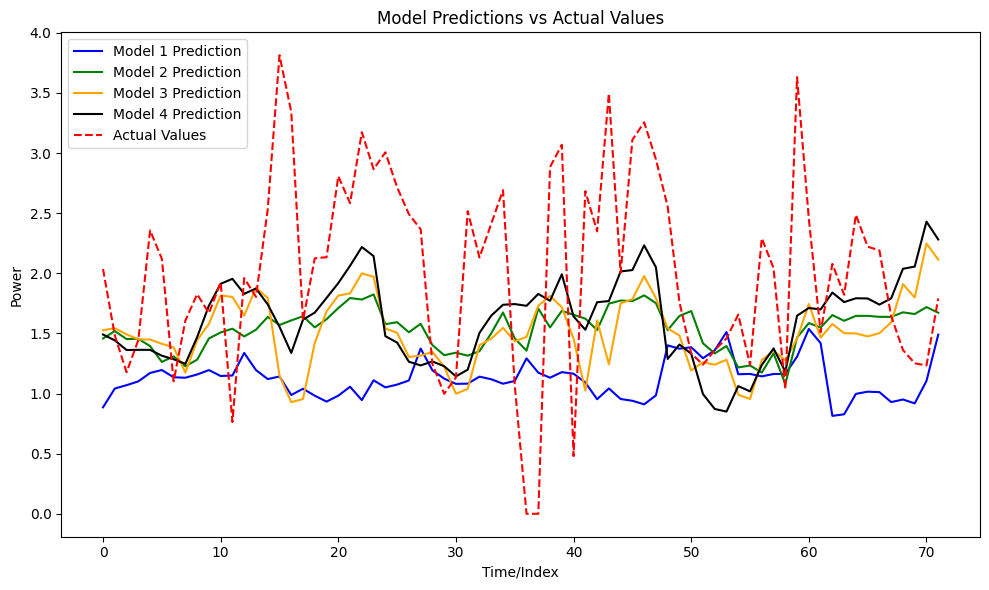

In [125]:
import matplotlib.pyplot as plt
# Example predictions and actual values
# pred1, pred2, pred3, pred4 are from different models, and week_5_df_actual is the actual value
plt.figure(figsize=(10, 6))
# Plotting different predictions
plt.plot(pred1, label='Model 1 Prediction', color='blue')
plt.plot(pred2, label='Model 2 Prediction', color='green')
plt.plot(pred3, label='Model 3 Prediction', color='orange')
plt.plot(pred4, label='Model 4 Prediction', color='black')
# Plotting the actual values
plt.plot(np.array(week_5_df_actual), label='Actual Values', color='red', linestyle='--')
# Adding title and labels
plt.title('Model Predictions vs Actual Values')
plt.xlabel('Time/Index')
plt.ylabel('Power')
# Adding legend
plt.legend()
# Display the plot
plt.tight_layout()
plt.show()


In [127]:
pred4.mean()

1.6126977149470898

In [128]:
week_5_df_actual.mean()

2.0133627645502643

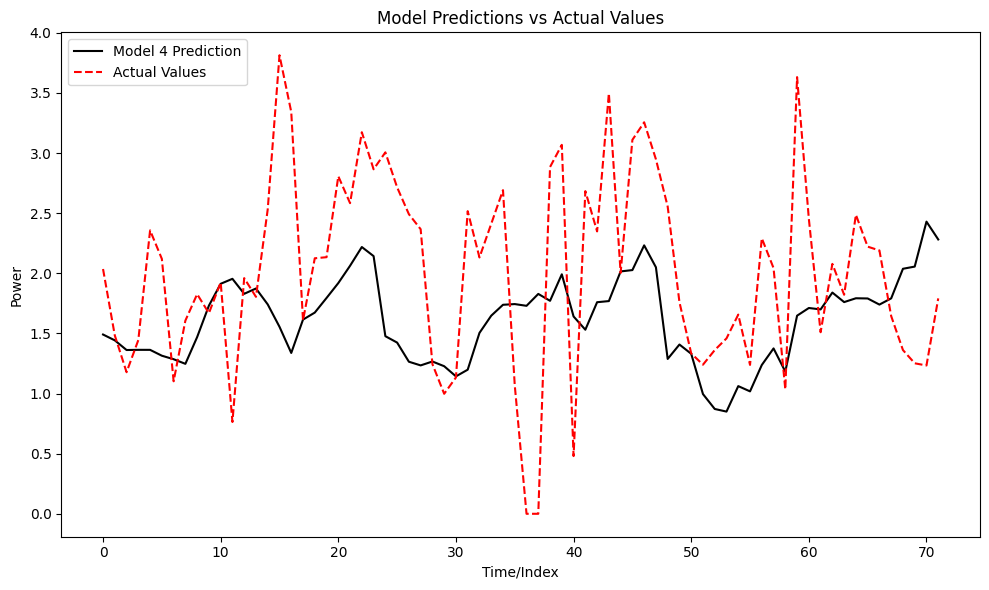

In [129]:
import matplotlib.pyplot as plt
# Example predictions and actual values
# pred1, pred2, pred3, pred4 are from different models, and week_5_df_actual is the actual value
plt.figure(figsize=(10, 6))
# Plotting different predictions
plt.plot(pred4, label='Model 4 Prediction', color='black')
# Plotting the actual values
plt.plot(np.array(week_5_df_actual), label='Actual Values', color='red', linestyle='--')
# Adding title and labels
plt.title('Model Predictions vs Actual Values')
plt.xlabel('Time/Index')
plt.ylabel('Power')
# Adding legend
plt.legend()
# Display the plot
plt.tight_layout()
plt.show()
